<a href="https://colab.research.google.com/github/acmoral/Subatomic-Visualizations/blob/main/TallerdeIntroduccion_Subatomica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Constantes  y paquetes

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants
from sklearn.linear_model import LinearRegression

In [ ]:
#Constantes:
Ryd=scipy.constants.value('Rydberg constant times hc in eV') #eV
a_0=scipy.constants.value('Bohr radius')*1e9# en nm
dr=scipy.constants.value('deuteron rms charge radius')*1e15 # en fm
muc2=scipy.constants.value('atomic mass constant energy equivalent in MeV')#masa del nucleon en MeV
hbarc=scipy.constants.value('reduced Planck constant times c in MeV fm') 
hbar=scipy.constants.value('Planck constant in eV/Hz')*1e-6#in Mev
gn=scipy.constants.value('neutron g factor')
gp=scipy.constants.value('proton g factor')
print(muc2)

931.49410242


# Punto 1


Para el átomo de hidrógeno.  

 
1.  Dibuje el potencial en unidades de la energía de Rydberg y del radio de Bohr, para l = 0, l = 2 y l = 4.
2. Las funciones de onda u1s(r), u2s(r) y u2p(r).
3. Calcule el radio cuadrático medio para el estado base.


Sabemos que el potencial efectivo tiene la forma:
$V_{eff}=-\frac{Ryd\cdot a_0}{r}+\frac{a_0a_0}{8\pi \epsilon_0 a_0}e^2l(l+1)$

Pero, si expresamos a r en unidades de $a_0$ de manera que $r/a_0=i$ donde $i$ es un numero real,de manera que el eje x son unidades de $a_0$.Y si $V_{eff}$ esta en unidades de Ryd, entonces,$V_{eff,ryd}=V_{eff}/Ryd$

$1Ryd=\frac{e^2}{8\pi \epsilon_0a_0}=13,6eV \qquad a_0=\frac{4\pi \epsilon \hbar^2}{m_ee^2}=0,0529nm$ 

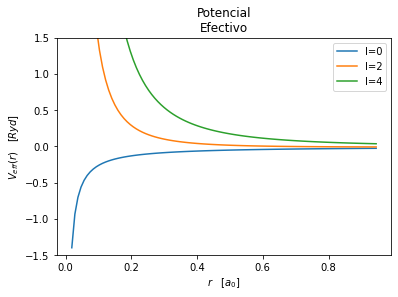

In [ ]:

X=[]
Y=[]
rang=np.linspace(0.001,0.05,100)
for l in range(3):
  X=[]
  Y=[]
  l=2*l
  for r in rang:
    r=r/a_0
    inv=1.0/r
    inv2=inv*inv
    Veff=Ryd*((l*(l+1)*inv2*a_0**2)-(inv*a_0/2))
    X.append(r)
    Y.append(Veff/Ryd)
  line=str(l)
  plt.plot(X,Y,label='l='+line)

plt.xlabel('$r \quad [a_0]$')
plt.ylabel('$V_{eff}(r) \quad [Ryd]$')
plt.title('Potencial\nEfectivo')
plt.ylim(-1.5,1.5)
plt.legend()
plt.show()
    

Ahora graficamos:

$u_{1s}(r)=\frac{2}{\sqrt{a_0^3}}\exp{(-r/a_0)}\\
u_{2s}(r)=\frac{r}{\sqrt{2a_0^3}}\left(1-\frac{r}{2a_0}\right)\exp(-r/2a_0)\\
u_{2p}(r)=\frac{r^2}{\sqrt{3}a_0}\frac{1}{2\sqrt{2a_0^3}}\exp(-r/2a_0)$

De manera que se obtiene lo siguiente:


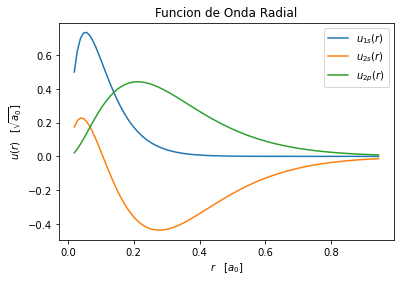

In [ ]:
X=[]
Y=[]
Z=[]
N=[]
for  r in rang:
 r=r/a_0
 u1=(2*r/math.sqrt(a_0*a_0*a_0))*math.exp(-r/a_0)
 u2=(r/math.sqrt(2*a_0*a_0*a_0))*(1-(r/(2*a_0)))*math.exp(-r/(2*a_0))
 u3=((r*r)/(math.sqrt(3)*a_0))*(1/(2*math.sqrt(2*a_0*a_0*a_0)))*math.exp(-r/(2*a_0))
 X.append(r)
 Y.append(u1*math.sqrt(a_0))
 Z.append(u2*math.sqrt(a_0))
 N.append(u3*math.sqrt(a_0))
plt.plot(X,Y,label='$u_{1s}(r)$')
plt.plot(X,Z,label='$u_{2s}(r)$')
plt.plot(X,N,label='$u_{2p}(r)$')
plt.xlabel('$r \quad [a_0]$')
plt.ylabel('$u(r) \quad [\sqrt{a_0}]$')
plt.title('Funcion de Onda Radial')
plt.legend()
plt.show()

Para el punto 3 tenemos que :
\begin{gather*}
\iiint\left|\psi_{n l m}(\vec{r})\right|^{2} \mathrm{d}^{3} r=\int\left|R_{n l}(\vec{r})\right|^{2} r^{2} \mathrm{d} r \iint\left|Y_{l m}(\theta, \phi)\right|^{2} \mathrm{d} \Omega=1
\end{gather*}
Para nuestro caso el estado base es $n=1$ y $l=0$ por lo que $R_{nl}=R_{10}$
\begin{gather*}
<\psi_{10}|r^2|\psi_{10}>=\\
\int\left|R_{1 0}(\vec{r})\right|^{2} r^{4} \mathrm{d} r \iint\left|Y_{1 m}(\theta, \phi)\right|^{2} \mathrm{d} \Omega
\end{gather*}
Por la ortonormalidad de los armónicos esfericos:
\begin{gather*}
\iint\left|Y_{1 m}(\theta, \phi)\right|^{2} \mathrm{d} \Omega=1
\end{gather*}
y solo nos queda la integral en la parte radial:
\begin{gather*}
\int\left|R_{1 0}(\vec{r})\right|^{2} r^{4} \mathrm{d} r =\int\frac{4}{a_0^3}\exp\left(\frac{2r}{a_0}\right)r^4\mathrm{d} r
\end{gather*}
Las constantes $\frac{4r}{a_0^3}$ se pueden sacar de la integral y adicionalmente se hace un cambio de variable como se ve en seguida:
\begin{gather*}
\frac{2r}{a_0}=u \qquad \mathrm{d} u=\frac{2\mathrm{d}r}{a_0}\quad u^4=\frac{2^4r^4}{a_0^4}
\end{gather*}
La integral anterior queda de la siguiente forma:
\begin{gather*}
\frac{4}{a_0^3}\frac{a_0^5}{2^5}\int \exp(-u)u^4 \mathrm{d} u
\\
=\frac{a_0^2}{2^3}\int \exp(-u)u^4 \mathrm{d} u
\end{gather*}
Integramos por partes:
\begin{gather*}
\frac{a_0^2}{2^3}\int \exp(-u)u^4 \mathrm{d} u
=\\
\frac{a_0^2}{2^3}\left[-u^4\exp(-u)\bigg|_{0}^{\infty}+ 4\int\exp(-u)u^3 \mathrm{d} u\right]
\\
=\frac{a_0^2}{2^1}\left[\int \exp(-u)u^3 \mathrm{d} u\right]
\\=\frac{a_0^2}{2^1}\left[-\exp(-u)u^3\bigg|_{0}^{\infty} +3\int\exp(-u)u^2\mathrm{d} u\right]
\\
=\frac{3a_0^2}{2}\left[\int\exp(-u)u^2\mathrm{d} u\right]
=\\
\frac{3a_0^2}{2}\left[-\exp(-u)u^2\bigg|_{0}^{\infty} +2\int\exp(-u)u\mathrm{d} u\right]=
\\
3a_0^2\left[\int\exp(-u)u\mathrm{d} u\right]\\
=3a_0^2\left[-\exp(-u)u\bigg|_{0}^{\infty}+\int\exp(-u)\mathrm{d} u\right]=
\\ 3a_0^2\left[\int\exp(-u)\mathrm{d} u\right]=
\\ 3a_0^2\left[\exp(-u)\bigg|_{0}^{\infty}\right]= 3a_0^2
\\
<r^2>= 3a_0^2
\\
\sqrt{<r^2>}=\sqrt{3}a_0
\end{gather*}

# Punto 2



Muestre que si una partícula en una dimensión está sometida a un potencial $V (x)$, tal que $V (x) =V (−x)$, los estados propios del Hamiltoniano asociado tienen paridad definida si no hay degenera-
miento.

Partiendo de la ecuacion de Schrödinger independiente del tiempo
\begin{gather*}
-\frac{\hbar^2}{2m}\frac{\partial\psi(x)^2}{\partial^2 x}+(V(x)-E)\psi(x)=0
\end{gather*}
Haremos la sustitución de $x\rightarrow -x$ por lo que $x^{\prime}=-x$ por lo que $\frac{\partial x^{\prime}}{\partial x}=-1$.Veamos como se comporta la segunda derivada parcial de x al hacer este cambio:
\begin{gather*}
\frac{\partial}{\partial x}=\frac{\partial }{\partial x^{\prime}}\frac{\partial x^{\prime}}{\partial x}=-\frac{\partial }{\partial x^{\prime}}
\\
\frac{\partial^2}{\partial x^2}=-\frac{\partial^2 }{\partial x^{\prime 2}}\left(\frac{\partial x^{\prime}}{\partial x}\right)^2+\frac{\partial}{\partial x^{\prime}}\frac{\partial^2x^{\prime}}{\partial x^2}=\frac{\partial^2 }{\partial x^{\prime 2}}
\end{gather*}
La doble derivada en invariante al cambio de variable, así como el potencial por lo que:
\begin{gather*}
-\frac{\hbar^2}{2m}\frac{\partial\psi(x^{\prime})^2}{\partial^2 x^{\prime}}+(V(x^{\prime})-E)\psi(x^{\prime})=0
\\
=-\frac{\hbar^2}{2m}\frac{\partial\psi(-x)^2}{\partial^2 x}+(V(x)-E)\psi(-x)
\end{gather*}
Esto significa que tanto $\psi(x)$ como $\psi(-x)$ son soluciones a la ecuacion de Schrödinger, osea que una superposicion o combinación lineal de estas es tambien solución:
\begin{gather*}
\psi(x)_{total}=\psi(x)+\psi(-x)
\end{gather*}
Esta solución es par ya que el cambiar $x\rightarrow -x$ deja a la funcion total igual. Ahora esta otra combinacion lineal es tambien una solucion total:
\begin{gather*}
\psi(x)_{total}=\psi(x)-\psi(-x)
\end{gather*}
Esta última es impar ya que el cambiar $x\rightarrow -x$ nos cambia a $\psi_{total}(x)\rightarrow -\psi_{total}(x) $. Por lo que vemos la función tiene una de estas soluciones, es decir tiene una paridad definida al ser posible ser par o impar.


#Punto 3

Presente varios argumentos del por qué el electrón no puede estar dentro del núcleo.

Hacemos un procedimiento parecido al anterior para ver el radio promedio de la posicion del estado baso del electron $<r>$
\begin{gather*}
<\psi_{10}|r|\psi_{10}>=\\
\int\left|R_{1 0}(\vec{r})\right|^{2} r^{3} \mathrm{d} r \iint\left|Y_{1 m}(\theta, \phi)\right|^{2} \mathrm{d} \Omega
\end{gather*}
Por la ortonormalidad de los armónicos esfericos:
\begin{gather*}
\iint\left|Y_{1 m}(\theta, \phi)\right|^{2} \mathrm{d} \Omega=1
\end{gather*}
y solo nos queda la integral en la parte radial:
\begin{gather*}
\int\left|R_{1 0}(\vec{r})\right|^{2} r^{3} \mathrm{d} r =\int\frac{4}{a_0^3}\exp\left(\frac{-2r}{a_0}\right)r^3\mathrm{d} r
\end{gather*}
Las constantes $\frac{4r}{a_0^3}$ se pueden sacar de la integral y adicionalmente se hace un cambio de variable como se ve en seguida:
\begin{gather*}
\frac{2r}{a_0}=u \qquad \mathrm{d} u=\frac{2\mathrm{d}r}{a_0}\quad u^3=\frac{2^3r^3}{a_0^3}
\end{gather*}
La integral anterior queda de la siguiente forma:
\begin{gather*}
\frac{4}{a_0^3}\frac{a_0^4}{2^4}\int \exp(-u)u^3 \mathrm{d} u
\\
=\frac{a_0}{2^2}\int \exp(-u)u^4 \mathrm{d} u
\end{gather*}
Integramos por partes:
$$
\frac{a_0}{2^2}\int \exp(-u)u^3 \mathrm{d} u
$$

$$=\\
\frac{a_0}{2^2}\left[-u^3\exp(-u)\bigg|_{0}^{\infty}+ 3\int\exp(-u)u^2 \mathrm{d} u\right]
\\
=\frac{3a_0}{2^2}\left[\int \exp(-u)u^2 \mathrm{d} u\right]
\\=\frac{3a_0}{2^2}\left[-\exp(-u)u^2\bigg|_{0}^{\infty} +2\int\exp(-u)u\mathrm{d} u\right]
\\
=\frac{3a_0}{2}\left[\int\exp(-u)u\mathrm{d} u\right]
\\ =\frac {3a_0}{2}\left[\exp(-u)\bigg|_{0}^{\infty}\right]= \frac{3a_0}{2}
\\
<r>= \frac{3a_0}{2}
$$

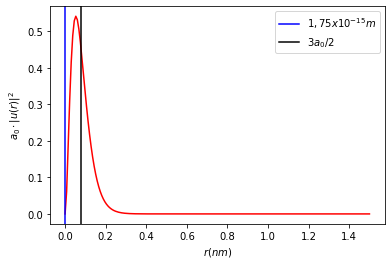

In [ ]:


# 100 linearly spaced numbers
x = np.linspace(0,1.5,200)
a_02=2/a_0
c= 2*a_02/a_0
# the function, which is y = x^2 here
a = np.empty(x.shape)
a.fill(a_0*3*a_0)
z=x+a
y = x*x*c*np.exp(-x*a_02)

# plot the function
plt.plot(x,y, 'r')
plt.axvline(x=0.0000017566,label='$1,75 x 10^{-15}m$',color='blue')
plt.axvline(x=3*a_0/2,label='$3a_0/2$',color='black')
plt.legend()
plt.xlabel('$r(nm)$')
plt.ylabel('$a_0\cdot|u(r)|^2 $')
# show the plot
plt.show()


El valor esperado calculado anteriormente de $<r>$ nos dice que en promedio la distancia del electron es $3a_0/2$ lo cual se muestra como una linea que corta con la parte radial de la funcion de densidad de probabilidad del electrón, para comparación se muestra el tamaño del nucleo que en la escala parece el eje en $r=0$ sin embargo esto se debe a que la escala esta en angstrom $10^{-11}$ y el tamaño del nucleo es 5 ordenes de magnitud más pequeño, es decir $1,7566\times10^{-15}m=1,7566fm$  lo cual responde la pregunta debido a que el valor esperado de la distancia del electron al origen esta muy lejos de la distancia que requeriria para estar dentro del nucleo, como ademas se ve en la distribucion de probabilidad, el electron no se encuentra en el nucleo por que la probabilidad es demasiado baja.

Tambien podríamos ver que la probabilidad para que este entre $0\leq r\leq 0.00017566$, es decir "dentro" del nucleo, es muy baja

\begin{gather*}
P(0\leq r\leq 0.00017566)=\frac{4}{a_{0}^{3}}\left[\left.e^{-2 r / a_{0}}\frac{-a_{0} r^{2}}{2}-\frac{a_{0}^{2} r}{2}-\frac{a_{0}^{3}}{4}\right|_{r=0} ^{r=0.00017566}\right.
=4.8\times 10^{-11}\approx 0
\end{gather*}

In [ ]:
d=0.00017566
x=1-math.exp(-2*d/a_0)*((2*d*d/(a_0*a_0))+(2*d/a_0)+1)
print(x)

4.852794222021117e-08


# Punto 4

Usando un potencial de pozo cuadrado como potencial nuclear n−p y aproximando a que la función
de onda del deuterio tiene sólamente componente $\ell = 0$, halle a) el valor de la profundidad del pozo
para que el deuterio tenga un único estado ligado (no utilice la aproximación de clase), b) dibuje
u0(r) como función de r y c) halle el radio cuadrático medio. Discuta sus resultados.

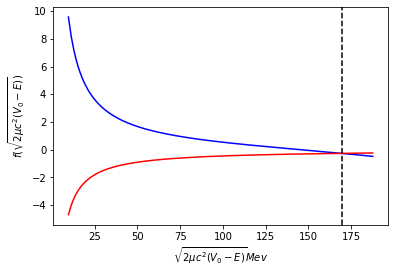

punto de corte: 169.74311675512996
Valor de V_0: 33.13173173173173 MeV


In [ ]:
x = np.linspace(2.3,40,1000) #se general valores  entre 0 100
e=2.2 #Energia MeV 
a = np.empty(x.shape)
a.fill(e)
x=x-e 
x=x*muc2 # contenido de la raiz
x=np.sqrt(x)
#funciones
y = np.cos(x*dr/hbarc)/np.sin(x*dr/hbarc) 
z=np.negative(x)
Err=1e-3 #error de igualdad para encontrar punto de corte
z=np.divide(np.ones(z.shape),z)
z=z*math.sqrt(muc2*e)
for i in range(x.size):
  if abs(y[i]-z[i])<=Err: #si difieren menos de 0.0003 entonces digo que cortan las graficas
    li=x[i]
    break
  else:
   li=0
# plot the function
plt.plot(x,y, 'b')
plt.plot(x,z, 'r')

plt.xlabel('$\sqrt{2\mu c^2 (V_0-E)} Mev $')
plt.ylabel('$f(\sqrt{2\mu c^2(V_0-E)}) $')
plt.axvline(x=li,label='o',color='black',linestyle='dashed')
# show the plot
plt.show()
print('punto de corte: '+str(li))
#valor de v_0
v0=li*li
v0=v0/muc2
v0=v0+e
print('Valor de V_0: '+str(v0)+' MeV')



Vamos a dibujar a $u_0(r)$

Por la continuidad sabemos que:
$$u_{I}(a)=A\sin(k_Ia)=u_{II}(a)=De^{-k_{II}a}$$
Y si ademas normalizamos las funciones de onda de manera que
$$\int_{0}^{a}u_{I}^2(r)dr+\int_{a}^{\infty}u_{II}^2(r)dr=1
\\
\int_{0}^{a}A^2\sin^2(k_Ir)dr+\int_{a}^{\infty}D^2e^{-2k_{II}r}dr=1
\\
A^2\int_{0}^{a}\sin^2(k_Ir)dr+D^2\int_{a}^{\infty}e^{-2k_{II}r}dr=1
\\
A^2\left(\frac{ak_{I}}{2}-\frac{\sin(2ak_1)}{4}\right)+D^2\frac{e^{-2k_{II}a}}{2k_{II}}=1
$$
Teniendo dos incognitas y 2 ecuaciones, estas quedan determinadas de la siguiente manera

$$A=D \frac{e^{-k_{II}a}}{\sin(k_{I}a)} \\
D=\left(\frac{\exp(-2k_{II}a)}{K_I\sin^2(k_Ia)}\cdot\left(\frac{ak_I}{2}-\frac{\sin^2(2ak_I)}{4}\right)+\frac{\exp(-2k_{II}a)}{2k_{II}}\right)^{-1}$$

Hagamos el radio cuadratico medio $\langle r^2\rangle$
$$\langle r^2\rangle=A^2\int_{0}^{a}r^2\sin^2(k_Ir)dr+D^2\int_{a}^{\infty}e^{-2k_{II}r}r^2dr
\\
u= r \qquad du=2rdr \qquad dv=\sin^2{k_{I}r} \qquad v= \frac{1}{k_{I}}\left(\frac{k_{I}r}{2}-\frac{\sin(2k_Ir)}{4}\right)
\\
\text{Primera integral}=\frac{r}{k_I}\left(\frac{k_{I}r}{2}-\frac{\sin(2k_Ir)}{4}\right)\bigg|_{0}^{a}-\int_{0}^{a}r^2-2r\frac{\sin(2k_Ir)}{4k_I}dr\\
\text{Primera integral}=\frac{a^2}{2}-\frac{a\sin(2k_Ia)}{4k_I}-\frac{a^3}{3}+\int_{0}^{a}\frac{2r\sin(2k_Ir)dr}{4k_I}
\\
2k_Ir=s \quad ds=2k_Ids
\\
c
\\
s=u \quad du=ds \quad \sin(s)=v \quad dv=-\cos(s)
\\
\text{Primera integral}=\frac{a^2}{2}-\frac{a\sin(2k_Ia)}{4k_I}-\frac{a^3}{3}+\frac{1}{2k_I}\left(s\sin(s)-\int\sin(s)ds\right)
\\
\text{Primera integral}=\frac{a^2}{2}-\frac{a\sin(2k_Ia)}{4k_I}-\frac{a^3}{3}+\frac{1}{2k_I}\left(2k_Ir\sin(2k_Ir)+\cos(2k_Ir)\right)\bigg|_{0}^{a}
\\
\text{Primera integral}=\frac{a^2}{2}-\frac{a\sin(2k_Ia)}{4k_I}-\frac{a^3}{3}+\frac{1}{2k_I}\left(2k_Ia\sin(2k_Ia)+\cos(2k_Ia)-1\right)
\\
\text{Primera integral}=\frac{a^2}{2}-\frac{a\sin(2k_Ia)}{4k_I}-\frac{a^3}{3}+a\sin(2k_Ia)+\frac{\cos(2k_Ia)}{2k_I}-\frac{1}{2k_I}
\\
\text{segunda integral}=\int_{a}^{\infty}r^2e^{-2k_{II}r}
\\
u=r^2 \quad du=2rdr \quad dv=e^{-2k_{II}r}\quad v=-\frac{1}{2k_{II}}e^{-2k_{II}r}
\\
\text{Segunda integral}=-\frac{1}{2k_{II}}r^2e^{-2k_{II}r}\bigg|_{a}^{\infty}+\int_{a}^{\infty}\frac{2r}{2k_{II}}e^{-2k_{II}r}dr
\\
\text{Segunda integral}=\frac{1}{2k_{II}}a^2e^{-2k_{II}a}+\frac{1}{k_{II}}\left(-\frac{r}{2k_{II}}e^{-2k_{II}r}\bigg|_{a}^{\infty}+\int_{a}^{\infty}\frac{1}{2k_{II}}e^{-2k_{II}}dr\right)
\\
\text{Segunda integral}=\frac{1}{2k_{II}}a^2e^{-2k_{II}a}+\frac{a}{2k_{II}^2}e^{-2k_{II}a}-\frac{1}{4k_{II}^3}e^{-2k_{II}r}\bigg|_{a}^{\infty}
\\
\text{Segunda integral}=\frac{1}{2k_{II}}a^2e^{-2k_{II}a}+\frac{a}{2k_{II}^2}e^{-2k_{II}a}+\frac{1}{4k_{II}^3}e^{-2k_{II}a}
\\
\langle r^2\rangle=A^2\text{Primera Integral}+ D^2\text{Segunda Integral}
\\
\langle r^2\rangle=A^2\left(\frac{a^2}{2}-\frac{a\sin(2k_Ia)}{4k_I}-\frac{a^3}{3}+a\sin(2k_Ia)+\frac{\cos(2k_Ia)}{2k_I}-\frac{1}{2k_I}\right)+D^2\left(\frac{1}{2k_{II}}a^2e^{-2k_{II}a}+\frac{a}{2k_{II}^2}e^{-2k_{II}a}+\frac{1}{4k_{II}^3}e^{-2k_{II}a}\right)
$$

raiz(<r^2>) 3.7103405417057136


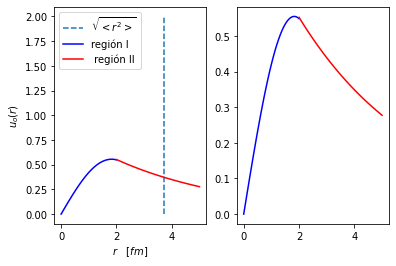

In [ ]:
r = np.linspace(0,2,100)
n=np.linspace(2,5,100)
fig, (ax1, ax2) = plt.subplots(1, 2)
#funciones
k1=math.sqrt(muc2*(v0-e))/hbarc
k2=math.sqrt(muc2*e)/hbarc
const=k1*dr
const=const/2
const=const-math.sin(2*k1*dr)/4
const2=math.exp(-2*k2*dr)/(2*k2)
const3=math.exp(-2*k2*dr)/(k1*math.sin(k1*dr)*math.sin(k1*dr))
sum=const3*const+const2
D=math.sqrt(1/sum)
A=D*math.exp(-k2*dr)/math.sin(k1*dr)
t = A*np.sin(r*k1)
u=D*np.exp(-k2*n)
r1=A**2*((dr**2/2)-(dr**3/3)-(dr*math.sin(2*k1*dr)/(4*k1))+(dr*math.sin(2*k1*dr))+(math.cos(2*k1*dr)/(k1*2))-1/(2*k1))+D**2*((dr**2/(2*k2)*math.exp(-2*k2*dr))+(dr/(2*k2**2)*math.exp(-2*k2*dr))+(math.exp(-2*k2*dr)/(4*k2**3)))
r1=math.sqrt(r1)
print('raiz(<r^2>)',r1)
# plot the function
si1=np.linspace(0,2,100)
si=np.ones(si1.size)*r1
ax1.plot(si,si1,linestyle='dashed',label='$ \sqrt{ <r^2 > } $')
ax1.plot(r,t, 'b',label='región I')
ax1.plot(n,u, 'r',label=' región II')
ax1.legend()
ax1.set(xlabel='$r \quad [fm]$',ylabel='$u_o(r)$')
ax2.plot(r,t, 'b',label='región I')
ax2.plot(n,u, 'r',label=' región II')


#Punto 5


Verifique que la expresión dada en clase
$$\tan \delta_{l}=-\frac{k a_{R} \hat{j}_{l}^{\prime}\left(k a_{R}\right)-\hat{j}_{l}\left(k a_{R}\right) \mathcal{L}_{I}\left(a_{R}\right)}{k a_{R} \hat{y}_{l}^{\prime}\left(k a_{R}\right)-\hat{y}_{l}\left(k a_{R}\right) \mathcal{L}_{I}\left(a_{R}\right)}$$
para hallar numéricamente el corrimiento de fase en el caso de una colisión gobernada por un potencial
de corto alcance, se reduce a la relación
$$k_{I} \cot \left(k_{I} a\right)=k_{I I} \cot \left(k_{I I} a+\delta_{0}\right)$$

deducida en clase para la interacción n − p, con l = 0, y en donde el potencial nuclear es un pozo
cuadrado de profundidad V0 y ancho a.
En la ec. (1) aR es la frontera en donde el potencial de corto alcance se desvanece, las primas indican
derivadas con respecto al argumento, se han usados las definiciones
$$\hat{j}_{l}(k r)=k r j_{l}(k r) ; \quad \hat{y}_{l}(k r)=k r y_{l}(k r)$$

y se ha tomado la derivada logarítmica como:

$$\mathcal{L}=a_{R} u^{\prime} / u$$



Vamos a escribir $a_R=a \quad x=ka$ queda entonces:
$$\tan \delta_{l}=-\frac{x \hat{j}_{l}^{\prime}\left(x\right)-\hat{j}_{l}\left(x\right) \mathcal{L}_{I}\left(a_{R}\right)}{x \hat{y}_{l}^{\prime}\left(x\right)-\hat{y}_{l}\left(x\right) \mathcal{L}_{I}\left(a_{R}\right)}
\\
\hat{j}_\ell=xj_\ell(x) \rightarrow \quad \hat{j}_0(x)=xj_0(x)=\sin(x)
\\
\hat{j}_\ell(x)^{\prime}=j_\ell(x)+x\hat{j}^{\prime}_\ell \quad \hat{j}_0(x)=j_0(x)+x\hat{j}^{\prime}_0=\frac{\sin(x)}{x}+\cos(x)-\frac{\sin(x)}{x}=\cos(x)
\\
\hat{y}_\ell=xy_\ell(x) \rightarrow \quad \hat{y}_0(x)=xy_0(x)=-\cos(x)
\\
\hat{y}_\ell(x)^{\prime}=y_\ell(x)+x\hat{y}^{\prime}_\ell \quad\rightarrow \hat{y}_0(x)^{\prime}=y_0(x)+x\hat{y}^{\prime}_0=-\frac{\cos(x)}{x}+\sin(x)+\frac{\cos(x)}{x}=\sin(x)
\\
\tan \delta_0\left(x \hat{y}_0^{\prime}\left(x\right)-\hat{y}_0\left(x\right) \mathcal{L}_{I}\left(a\right)\right)=-x \hat{j}_0^{\prime}\left(x\right)+\hat{j}_0\left(x\right) \mathcal{L}_{I}\left(a\right)
\\
\tan \delta_0x \hat{y}_0^{\prime}\left(x\right)+x \hat{j}_0^{\prime}\left(x\right)=(-\hat{j}_0\left(x\right)+\hat{y}_0\left(x\right) \tan(\delta_0) )\mathcal{L}_{I}\left(a\right)
\\
x\tan\delta_0\sin(x)+x\cos(x)=\mathcal{L}_{I}\left(a\right)\left(\sin(x)-\cos(x)\tan\delta_0\right)
\\
x\cos(x)(\tan\delta_0\tan(x)+1)=\cos(x)\mathcal{L}_{I}\left(a\right)\left(\tan(x)-\tan\delta_0\right)
\\
x\frac{(\tan\delta_0\tan(x)+1)}{\left(\tan(x)-\tan\delta_0\right)}=\mathcal{L}_{I}\left(a\right)
\\
x\cot(x-\delta)=\mathcal{L}_{I}\left(a\right)
$$
Sabiendo que 
$$u_I=k_Irj_0=\sin(k_I a)\quad u_I^{\prime}=k_I\cos(k_Ia)-\frac{\sin(k_Ia)}{a}+\frac{\sin(k_Ia)}{a} =k_I\cos(k_Ia) 
\\
\mathcal{L}_{I}\left(a\right)=a\frac{k_I\cos(k_Ia)}{\sin(k_Ia)}=ak_I\cot(k_Ia)
$$
Reemplazamos en lo obtenido anteriormente:
$$
ak_{II}\cot(k_{II}a-\delta)=\mathcal{L}_{I}\left(a\right)=ak_I\cot(k_Ia)
\\
k_{II}\cot(k_{II}a-\delta)=k_I\cot(k_Ia)
$$


##Punto 6

Grafique la sección eficaz diferencial elástica (distribución angular) en la aproximación de Born para
la colisión de un neutrón y un protón. Tome el potencial n − p del artículo adjunto (Ec. (9)), el
cual modela el potencial nucleón-nucleon fenomenológicamente por un potencial central. Tenga en
cuenta que los estados de proyección de isospin son definidos como en física de partículas y tome el
parámetro u = 1. Para la sección eficaz, escoja una energía de colisión en donde la aproximación de
Born sea válida.

EL potencial que se da en el artículo para la interacción neutorn neutron:
\begin{gather*}
V_{ij}=\left(V_R+\frac{1}{2}(1+P_{ij}^{\sigma}V_t)+\frac{1}{2}(1-P_{ij}^{\sigma}V_s)\right)\left(\frac{1}{2}u+\frac{1}{2}(2-u)P_{ij}^{r}\right)+\frac{1}{2}(1+\tau_{iz})\frac{1}{2}(1+\tau_{jz})\frac{e^2}{r_{ij}}
\end{gather*}
Aplicamos este potencial al deuterio $n-p$ ya que en general este potencial es válido para 2 nucleones cualquiera: neutron$\rightarrow i$, proton $\rightarrow j$.En particular sabemos que los valores $S=1,t=0,l=0,2$ corresponden al estado triplete.Por lo tanto podemos ver que los operadores son:
\begin{gather*}
P_{ij}^{\sigma}=(-1)^{s+1}=(-1)^2=1
\\
P_{ij}^{r}=(-1)^l=(-1)^0=1
\end{gather*}
adicionalmente la proyeccion $\tau_{iz}$ es la carga, sin embargo corrida de manera que:
\begin{gather*}
(1+\tau_{iz})=0 \qquad (1+\tau_{jz})=1
\end{gather*}
De manera que 
\begin{gather*}
V_{ij}=(V_R+V_t)
\end{gather*}
Entonces la amplitud de scattering es:
\begin{gather*}
f(\theta)=\frac{-2\mu}{q\hbar^2}\int_{0}^{\infty}r\sin(qr)\left(V_R+V_t\right)dr
\end{gather*}
Donde de la información del artículo tenemos que :
\begin{gather*}
V_{\mathrm{R}}=V_{0R} \exp \left(-\kappa_{\mathrm{R}} r_{i j}^{2}\right)
\\
V_{\mathrm{0R}}=200.0 \mathrm{MeV}, \quad \kappa_{\mathrm{R}}=1.487 \mathrm{fm}^{-2}
\\
V_{\mathrm{t}}=-V_{0t} \exp \left(-\kappa_{\mathrm{t}} r_{i j}^{2}\right)
\\
V_{\mathrm{0t}}=178.0 \mathrm{MeV}, \quad \kappa_{\mathrm{t}}=0.639 \mathrm{fm}^{-2}
\end{gather*}
Así que se resolveremos para $V_{R}$ ya que $V_{t}$ tiene la misma forma entonces:
\begin{gather*}
\int_{0}^{\infty}r\sin(qr)V_Rdr=V_{0R}\int_{0}^{\infty}r\sin(qr)\exp(\kappa_Rr^2)dr
\\
r\exp(-\kappa_Rr^2)=dv \quad v=\frac{-1}{2\kappa_R}\exp(-\kappa_R r^2)
\\
u=\sin(q r) \qquad du=q\cos(qr)
\\
-\frac{\sin(qr)}{2\kappa_R}\exp(-\kappa_R r^2)\bigg|_0^{\infty}+\int \frac{1}{2\kappa_R}\exp{-\kappa_R r^2}q\cos(qr)dr
\\
=\frac{q}{2\kappa_R}\int_0^{\infty}\exp{-\kappa_R r^2}\cos(qr)dr
\end{gather*}
como es las funciones dentro son pares $\int_{0}^{\infty}f(r)dr=\frac{1}{2}\int_{-\infty}^{\infty}f(r)dr$.
\begin{gather*}
\int_{0}^{\infty}r\sin(qr)V_Rdr=\frac{q}{4\kappa_R}\int_{-\infty}^{\infty}\exp(-\kappa_R r^2)\cos(qr)dr
\\
\int_{0}^{\infty}r\sin(qr)V_Rdr=\frac{q}{4\kappa_R}\mathbb{Re}\left\{\int_{-\infty}^{\infty}\exp(-\kappa r^2+iqr)dr\right\}
\\
=\frac{q}{4\kappa_R}\mathbb{Re}\left\{\int_{-\infty}^{\infty}\exp-(\kappa_R r^2-iqr+\frac{q^2}{4\kappa_R}-\frac{q^2}{4\kappa_R})dr\right\}
\\
=\frac{q}{4\kappa_R}\mathbb{Re}\left\{\int_{-\infty}^{\infty}\exp-(\sqrt{\kappa_R}r-\frac{iq}{2\sqrt{\kappa_R}})^2dr\right\}
\\
\sqrt{\kappa_R}r-\frac{iq}{2\sqrt{\kappa_R}}=t \qquad dt=\sqrt{\kappa_R}dr 
\\
r \rightarrow \infty \quad t\rightarrow \infty
\\
r\rightarrow -\infty \quad t\rightarrow -\infty
\\
=\frac{q}{4\kappa_R}\exp(-\frac{q^2}{4\kappa_R})\mathbb{Re}\left\{\int_{-\infty}^{\infty}\exp(-t^2)\frac{dt}{\sqrt{\kappa_R}}\right\}
\\
=                                                             \frac{q}{4(\kappa_R)^{3/2}}\exp\left(-\frac{q^2}{4\kappa_R}\right)\sqrt{\pi}
\end{gather*}
En total tendríamos:
\begin{gather*}
f(\theta)=\frac{V_{0R}q}{4(\kappa_R)^{3/2}}\exp\left(\frac{-q^2}{4\kappa_R}\right)\sqrt{\pi}-\frac{V_{0t}}{4(\kappa_t)^{3/2}}\exp\left(\frac{q^2}{4\kappa_t}\right)\sqrt{\pi}
\end{gather*}
donde $q=2k\sin\left(\frac{\theta}{2}\right)$,donde $k^2=\frac{2\mu E}{\hbar^2}$:
\begin{gather*}
f(\theta)_{triplete}=-\frac{V_{0R}\mu c^2}{\kappa_R^{3/2}2\hbar^2c^2}\exp\left(\frac{-q^2}{4\kappa_R}\right)\sqrt{\pi}+\frac{V_{0t}\mu c^2}{\kappa_t^{3/2}2 \hbar^2 c^2}\exp\left(\frac{-q^2}{4\kappa_t}\right)\sqrt{\pi}
\end{gather*}
Ahora para el estado singlete: $S=0,t=1,l=0,2$ .
\begin{gather*}
P_{ij}^{\sigma}=(-1)^{1}=(-1)^1=-1
\\
P_{ij}^{r}=(-1)^l=(-1)^0=1
\end{gather*}
Los operadores $tau_{iz},\tau_{jz}$ siguen teniendo los mismos valores por lo que:
$$V_{ij}=(V_R+V_s)$$
Donde tenemos de las referencias del libro que :
$$ V_s = −V_{0s} exp(−\kappa_sr^2)
\\
V_{0s} = 91,85\text{ MeV} \quad \kappa_s = 0,465 fm^{-2}$$
Como tiene la misma forma funcional de las anteriores funciones deducimos que las integrales y otros procedimientos se pueden extender a este potencial:
\begin{gather*}
f(\theta)_{singlete}=-\frac{V_{0R}\mu c^2}{\kappa_R^{3/2}2\hbar^2c^2}\exp\left(\frac{-q^2}{4\kappa_R}\right)\sqrt{\pi}+\frac{V_{0s}\mu c^2}{\kappa_t^{3/2}2 \hbar^2 c^2}\exp\left(\frac{-q^2}{4\kappa_s}\right)\sqrt{\pi}
\end{gather*}

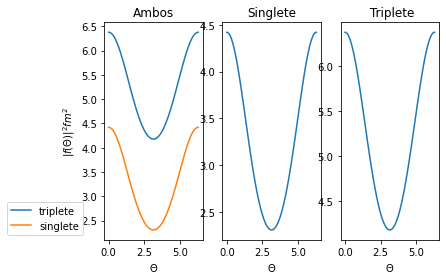

In [ ]:
V_0R=200#MeV
V_0t=178#Mev
V_0s=97.85#MeV
k_s=0.465#fm-2
k_R=1.487#fm-2
k_t=0.639#fm-2
muc2=931.5 #masa del nucleon por c^2
hbarc=197.3 #hbarra por c
e=2.2 #Energia MeV 
k=math.sqrt(2*muc2*e)/hbarc #wavenumber
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
thet=np.linspace(0,2*math.pi,100)
q=np.sin(thet/2)*2*k
f1=-V_0R*muc2/(math.pow(k_R,3/2)*2*hbarc**2*2)*np.exp(-q**2/(4*k_R))*math.sqrt(math.pi)
f2=V_0t*muc2/(math.pow(k_t,3/2)*2*hbarc**2*2)*np.exp(-q**2/(4*k_t))*math.sqrt(math.pi)
f_triplete=f1+f2
f3=V_0s*muc2/(math.pow(k_s,3/2)*2*hbarc**2*2)*np.exp(-q**2/(4*k_s))*math.sqrt(math.pi)
f_singlete=f1+f3
f_triplete=np.power(f_triplete,2)
f_singlete=np.power(f_singlete,2)
ax1.set(xlabel='$\Theta$',ylabel='$|f( \Theta )|^2 fm^2$' )
ax1.set_title('Ambos')
ax1.plot(thet,f_triplete,label='triplete')
ax3.set(xlabel='$\Theta$')
ax3.set_title(' Triplete')
ax3.plot(thet,f_triplete)
ax2.set(xlabel='$\Theta$')
ax1.plot(thet,f_singlete,label='singlete')
ax1.legend(loc="lower center", bbox_to_anchor=(-0.6, 0), ncol= 1)
ax2.set_title('Singlete')
ax2.plot(thet,f_singlete)

##Punto 7


Grafique la fórmula de masa de Weizsäcker-Bethe (B/A) con los parámetros de la tabla 2.5 del libro
adjunto. Añada 10 valores experimentales y compare.

\begin{align}
B=b_{\mathrm{vol}} A-b_{\mathrm{surf}} A^{2 / 3}-\frac{1}{2} b_{\mathrm{sym}} \frac{(N-Z)^{2}}{A}-b_{\mathrm{C}} \frac{Z^{2}}{A^{1 / 3}}+\delta(A)
\end{align}

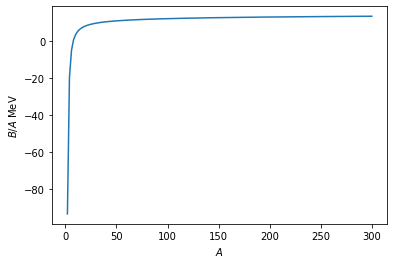

In [ ]:
#even even
b_v=16.2#MeV
b_s=19.0#Mev
b_sym=47#Mev
b_c=0.755#MeV
A=np.linspace(1,150,150)#genera numeros enteros de 1 a 150 
A=2*A #A es par entonces se multiplican los numeros anteriores por 2
Z=4 #Z tambien es par
N=8 # N par, ya que el termino delta es positivo es el nucleo mas estable A par N par Z par
delta=12*np.power(A,-1/2) 
B=(b_v*A)-(b_s*np.power(A,2/3))-(0.5*b_sym*np.power(N-Z,2)*np.power(A,-1))-(b_c*np.power(Z,2)*np.power(A,-1/3))+delta
B=B/A
plt.xlabel('$A$')
plt.ylabel('$B/A$ MeV')
plt.plot(A,B)

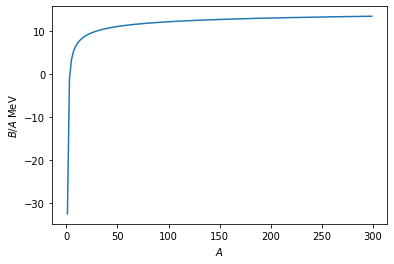

In [ ]:
#odd
b_v=16.3#MeV
b_s=19.2#Mev
b_sym=45.4#Mev
b_c=0.770#MeV
A=np.linspace(1,150,150) #genera numeros enteros de 1 a 150 
A=A*2-1#se hace A impar 
Z=3 # z tambien  impar
N=4 # N par
delta=0
B=(b_v*A)-(b_s*np.power(A,2/3))-(0.5*b_sym*np.power(N-Z,2)*np.power(A,-1))-(b_c*np.power(Z,2)*np.power(A,-1/3))+delta
B=B/A
plt.xlabel('$A$')
plt.ylabel('$B/A$ MeV')
plt.plot(A,B)

#Punto 8


Determine el momento angular total, paridad y energía del estado base (presente esquemas de con-
figuración de los niveles en donde se ubican los nucleones), según el modelo de capas de oscilador

armónico para los siguientes núcleos: $^{11}B, ^{12}C, ^{14}N, ^{16}O, ^{18}F, ^{16}F, ^{20}Ne, ^{27}Al, ^{41}Ca, ^{69}Ga  $  y  $^{208}Pb.$


---



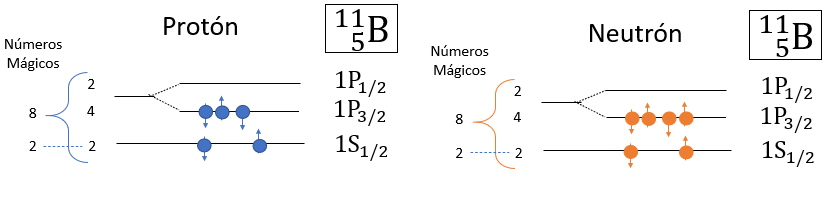

Cada par proton y par neutron forman un sistema con momento angular nulo y con paridad positiva. por lo tanto lo que determina la paridad y momento angular total es el neutrón que no forma par con ninguno, ubicado en el nivel $1P_{3/2}$.Por lo que se tendría de acuerdo a este arreglo obtenido del modelo de capas ,$J$ el momento angular total, $\pi$ la paridad , $E_{base}$ la energía del nivel de fermi o estado base:
\begin{gather*}
J=\frac{3}{2} \quad \ell=1 \quad \text{por lo tanto } \rightarrow \pi=-
\end{gather*}
Para calcular la energía del estado base, se calcula a partir del ultimo nivel lleno para el neutron :
\begin{gather*}
E_{base}=\hbar\omega [2(n-1)+l+\frac{3}{2}]-U_0+\alpha\begin{cases}
    l+1& \rightarrow l-\frac{1}{2}\\
    -l& \rightarrow l+\frac{1}{2}
\end{cases}
\end{gather*}
Por lo tanto para este caso:
$$
E_{base,n}=\hbar \omega\frac{5}{2}-U_0-\alpha
$$


---



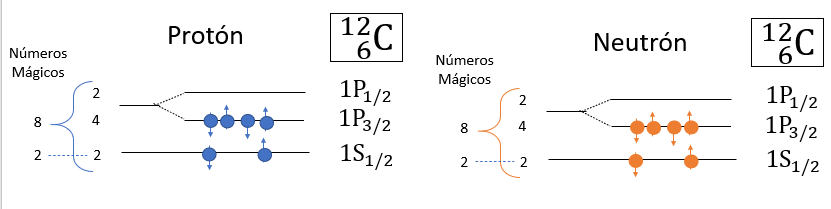

Ya que cada proton tiene un de espin opuesto que anula su momento angular, de igual manera para los neutrones, se tiene ademas que para un sistema con numero par-par de neutrones y protones experimentalmente:
$$
J=0 \quad \pi=+
$$
Mientras que la energía del estado base es la energía del nivel $1P_{3/2}$, como en el caso anterior:
\begin{gather*}
E_{base}=\hbar \omega \frac{5}{2}-U_0-\alpha
\end{gather*}


---



In [ ]:
u0=36.73673673673674 
E=2.2
hbaromega=E*2


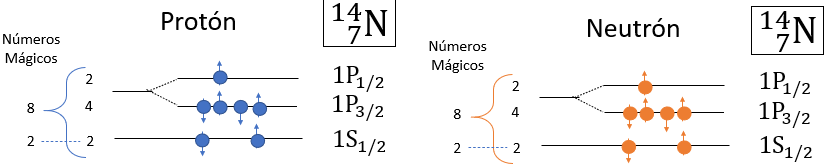

Todos los neutrones y protones forman pares, sin embargo queda un proton y un neutron sin aparear en el nivel $1P_{1/2}$ estos determinan la paridad y momento angular de acuerdo las reglas de Nordheim, antes que nada la adicion de momentos del par neutron proton restantes es:
\begin{gather*}
|j_p-j_n|\leq J \leq j_p+j_n \rightarrow 0\leq J \leq 1
\\
\mathcal{N}=j_p-l_p+j_n-l_n=\frac{1}{2}-1+\frac{1}{2}-1=1-2=-1
\\
\text{por lo tanto} \quad J=0 \quad  \wedge \quad J=1
\end{gather*}
Pero además sabemos que:
\begin{gather*}
|l_p-l_n|\leq l \leq l_p+l_n \rightarrow 0\leq l \leq 2
\\
|s_p-s_n|\leq s \leq s_p+s_n \rightarrow 0\leq l \leq 1
\\
J=l\pm s 
\\
\text{si} \quad  l=0 ,s=0, J=0 \quad s=0\text{ por el principio de exclusión de pauli}
\\
\text{si} \quad  l=1 ,s=1, J=2
\end{gather*}
Sabemos que $J\neq 2$ así que descartamos la segunda posibilidad. si $l=2,s=0, J=2$ lo cual tambien se descarta, de modo que:
$$
J=0 \quad l=0 \quad s=0
\\
\pi=(-1)^{l_n}(-1)^{l_p}=1=+
$$
El estado base es el del nivel $1P_{3/2}$:
$$E_{base}=\hbar \omega \frac{5}{2} -U_0-\alpha$$


---



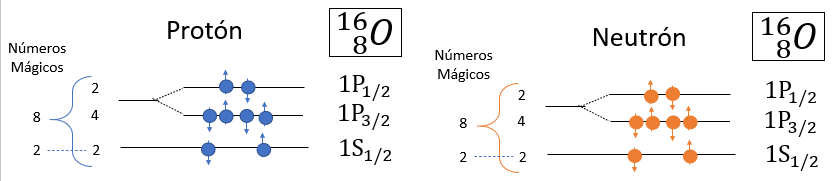

Ya que se tiene un numero par-par de neutrones y protones estos forman pares que anulan sus momentos angulares totales, de manera que:
$$J=0 \quad \pi=+$$
Su energía de estado base es la del ultimo nivel lleno, seguiria siendo el nivel $1P_{3/2}$:
$$
E_{base}=\hbar \omega \frac{5}{2} -U_0-\alpha
$$


---




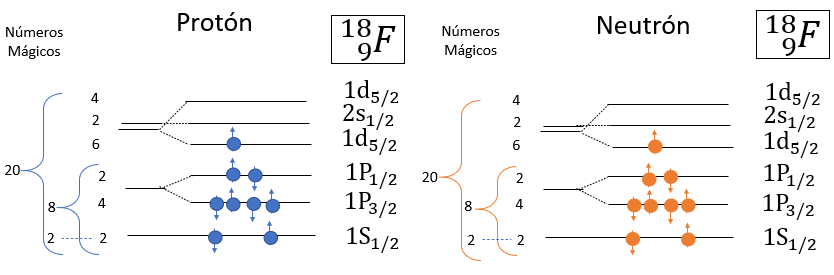

De manera que la cantidad de protones y neutrones es impar usamos:
$$
\mathcal{N}=\frac{5}{2}-2+\frac{5}{2}-2=5-4=1
\\
J=5 \wedge J=0 \qquad \pi=(-1)^2(-1)^2=1=+
$$
El ultimo nivel lleno es $1P_{1/2}$:
$$E_{base}=\hbar \omega \frac{5}{2} -U_0+2\alpha$$


---



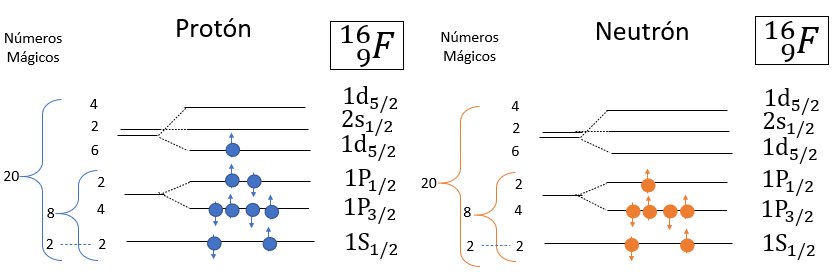

En este caso se tiene igualmente que la cantidad de protones y neutrones son impares. de manera que seguimos el mismo procedimiento:
$$
\mathcal{N}=\frac{1}{2}-1+\frac{5}{2}-2=3-3=0
\\
J=|j_n-j_p|=|\frac{1}{2}-\frac{5}{2}|=2
\\
\pi=(-1)^2(-1)^1=(1)(-1)=-1=-
$$
El último nivel lleno es $1P_{3/2}$
$$E_{base}=\hbar \omega \frac{5}{2} -U_0-\alpha$$


---



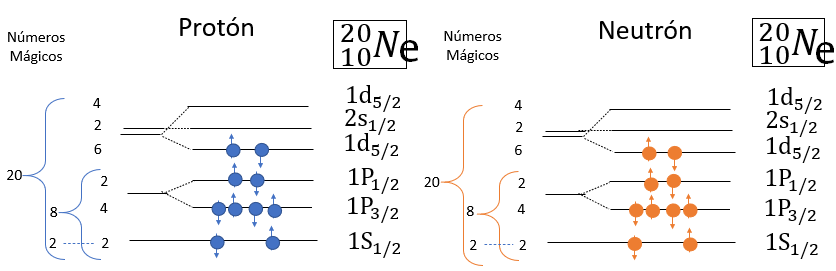

Ya que la cantidad de protones y neutrones es par-par se tiene que sus momentos angulares totales se anulan:
$$
J=0 \qquad \pi =+
$$
El ultimo nivel lleno es$1P_{1/2}$:

$$E_{base}=\hbar \omega \frac{5}{2} -U_0+2\alpha$$


---


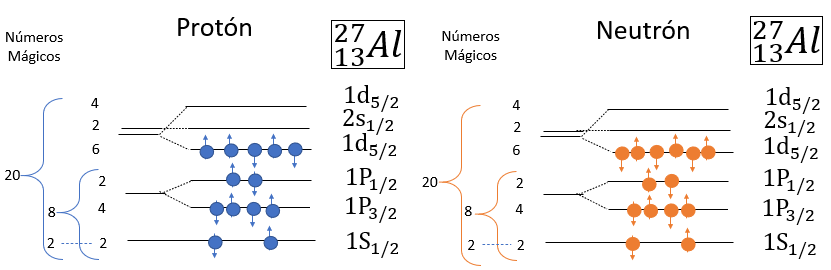

Ya que queda un proton sin aparear este determina el momento angular total y la paridad:
$$
J=\frac{5}{2} \qquad \pi=(-1)^2=+
$$
EL último nivel lleno es $1d_{3/2}$:
$$
E_{base}=\hbar \omega \frac{7}{2}-U_0+2\alpha
$$


---



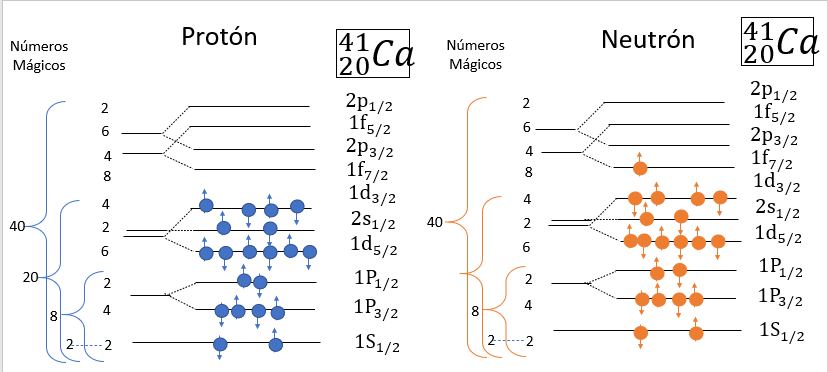

De nuevo los protones y neutrones estan apareados excepto un neutron en el nivel $1f_{7/2}$ es este el que determina la paridad y momento angular total
$$
J=7/2 \quad \pi =-
$$
El ultimo nivel lleno determina el nivel de fermi,$1d_{3/2}$:
$$
E_{base}=\hbar\omega \frac{7}{2}-U_0-2\alpha
$$


---



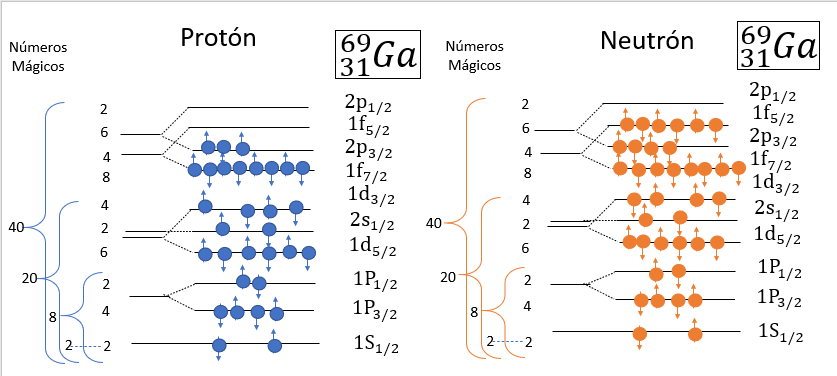

EL único nucleón que no tiene un par para aparearse  es el proton que esta en el nivel $2P_{3/2}$:
$$
J=3/2 \qquad \pi=-
$$
El nivel de fermi va a ser el último nivel lleno el cual es $1f_{5/2}$:
$$
E_{base}=\frac{9}{2}\hbar\omega-U_0+4\alpha
$$


---



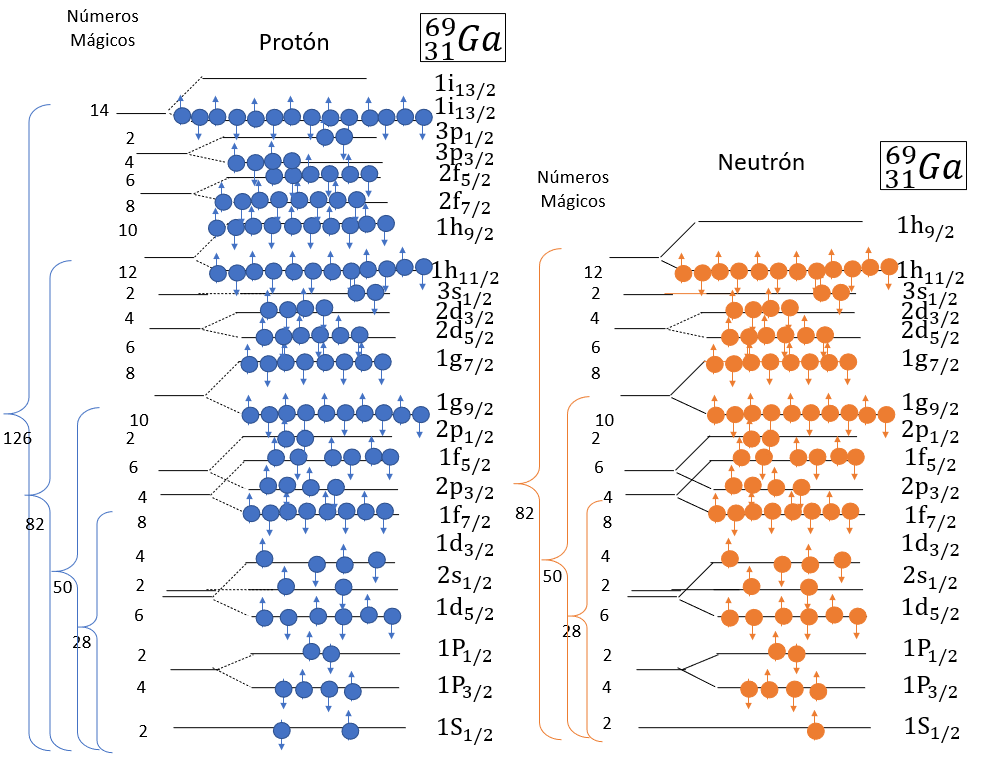

Para este caso de numero par de neutrones y protones su momento angular se anula y su paridad es positiva:
$$J=0 \qquad \pi=+$$
El último nivel lleno es el $1i_{13/2}$ por lo que la energía del estado base se calcula para este nivel:
$$
E_{base}=\hbar \omega \frac{15}{2}-U_0-6\alpha
$$


---



# Punto 9

Calcule el momento magnético de los núcleos$ 75Ge, 87Sr, 91Zr, 44Sc, 47Sc, 147Eu , 209Bi$, según el
modelo de capas. Compare con los resultados experimentales y analice en cada caso.

In [ ]:
muN=scipy.constants.value('nuclear magneton in eV/T')
#75 Ge
m=(-gn/2) # nivel en el modelo de capas: 1g1/2
dif=abs(m-0.510)/0.510
print('momento magnético de 75 Ge: ',m, ' Mn', ',diferencia %: ',dif *100)
#87 Sr
m=(-gn/2)# nivel en el modelo de capas: 1g1/2
dif=abs(m-1.0928)/1.0928
print('momento magnético de 87 Sr: ',m, ' Mn','diferencia %: ',dif *100)
#91 Zr
m=(-gn/2)*(7/2)/(9/2)# nivel en el modelo de capas 1g7/2 
dif=abs(m-1.30362)/1.30362
print('momento magnético de 91 Zr: ',m, ' Mn','diferencia %: ',dif *100)
#44 Sc
print('Para 44 Sc la teoria desarrollada no es válida ya que se tiene que para los niveles base \n el momento magnetico es 0, y para los pares-impares el momento magnetico esta \n dado por el nucleón desapareado, y ya que se basa en encontrar el momento para una particula \n desapareada, no aplica')
#47 Sc
m=(3+gp/2) #nivel en el modelo de capas 1f7/2 
dif=abs(m-5.34)/5.34
print('momento magnético de 47 Sc: ',m, ' Mn','diferencia %: ',dif *100)
# 147 Eu
m=(2+(gp/2))#2d5/2
dif=abs(m-4.0)/4.0
print('momento magnético de 147 Eu: ',m, ' Mn','diferencia %: ',dif *100)
#209 Bi
m=(6-gp/2)*(9/11) #1h9/2
dif=abs(m-3.5)/3.5
print('momento magnético de 209 Bi: ',m, ' Mn','diferencia %: ',dif *100)

[IAEA Nuclear Data](https://www-nds.iaea.org/nuclearmoments/)
 de donde se obtuvieron los datos para la comparación porcentual




#Punto 10

Escoja y dibuje tres espectros vibracionales y tres espectros rotacionales nucleares experimentales
¿Qué tanto se alejan de un vibrador/rotor ideal? Derive los momentos de inercia y frecuencias de
oscilación en cada caso.

Text([280.], 0.5347, '[6]$^{+}$')

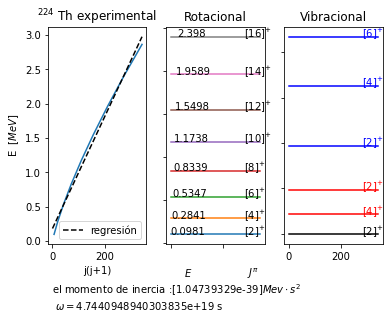

In [ ]:
E=np.array([0.0981,0.2841 ,0.5347, 0.8339, 1.1738, 1.5498, 1.9589 ,2.398 ,2.864])
j=np.array([2,4,6,8,10,12,14,16,18]).reshape((-1, 1))
jsuper=(j+1)*j
x=np.linspace(0,jsuper[8],100)
fig,(ax1,ax2,ax3)=plt.subplots(1,3)
model = LinearRegression()
model.fit(jsuper,E)
ax1.plot(jsuper,E)
ax1.plot(x,x*model.coef_+ model.intercept_,linestyle='dashed',color='black',label='regresión')
ax1.legend()
ax1.set_xlabel('j(j+1)')
ax1.set_ylabel('E  $[MeV]$')
for i in range(8):
  y=np.ones(100)*E[i]
  ax2.plot(x,y)
  ax2.text(x[i],y[i],str(E[i]))
  ax2.text(x[0]+280,y[i],str(j[i])+'$^{+}$')
ax2.text(290,-0.4,'$J^{\pi}$')
ax2.text(50,-0.4,'$E$')
I=hbar**2/(2*model.coef_)
omega=E[0]/hbar*2
ax1.text(0,-1,'el momento de inercia :'+str(I)+'$Mev \cdot s^2$ \n $\omega=$' + str(omega)+' s')
ax2.set_xticklabels([])
ax1.set_title('$^{224}$ Th experimental')
ax2.set_title('Rotacional')
ax3.set_title('Vibracional')
y=np.ones(100)*E[0]
ax3.plot(x,y,color='black')
ax3.text(x[0]+280,y[0],str(j[0])+'$^{+}$')
ax3.set_yticklabels([])
ax2.set_yticklabels([])
y=np.ones(100)*E[0]
ax3.plot(x,y*2,color='red')
ax3.text(x[0]+280,2*y[0],str(j[0])+'$^{+}$',color='red')
y=np.ones(100)*E[1]
ax3.plot(x,y/2,color='red')
ax3.text(x[0]+280,y[0]/2,str(j[1])+'$^{+}$',color='red')
y=np.ones(100)*E[0]
ax3.plot(x,y*3,color='blue')
ax3.text(x[0]+280,3*y[0],str(j[0])+'$^{+}$',color='blue')
ax3.set_yticklabels([])
y=np.ones(100)*E[1]
ax3.plot(x,y*3/2,color='blue')
ax3.text(x[0]+280,3*y[0]/2,str(j[1])+'$^{+}$',color='blue')
y=np.ones(100)*E[2]
ax3.plot(x,y,color='blue')
ax3.text(x[0]+280,y[0],str(j[2])+'$^{+}$',color='blue')

Text([500.], 0.30718, '[6]$^{+}$')

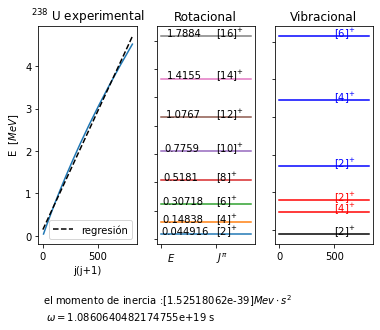

In [ ]:
E=np.array([ 0.044916, 0.14838, 0.30718 ,0.5181, 0.7759, 1.0767 ,1.4155, 1.7884 ,2.1911, 2.6191 ,3.0681, 3.5353 ,4.0181, 4.517])
j=np.array([2,4,6,8,10,12,14,16,18,20,22,24,26,28]).reshape((-1, 1))
jsuper=(j+1)*j
x=np.linspace(0,jsuper[-1],100)
fig,(ax1,ax2,ax3)=plt.subplots(1,3)
model = LinearRegression()
model.fit(jsuper,E)
ax1.plot(jsuper,E)
ax1.plot(x,x*model.coef_+ model.intercept_,linestyle='dashed',color='black',label='regresión')
ax1.legend()
ax1.set_xlabel('j(j+1)')
ax1.set_ylabel('E  $[MeV]$')
for i in range(8):
  y=np.ones(100)*E[i]
  ax2.plot(x,y)
  ax2.text(x[i],y[i],str(E[i]))
  ax2.text(x[0]+500,y[i],str(j[i])+'$^{+}$')
ax2.text(500,-0.2,'$J^{\pi}$')
ax2.text(50,-0.2,'$E$')
I=hbar**2/(2*model.coef_)
omega=E[0]/hbar*2
ax1.text(0,-2,'el momento de inercia :'+str(I)+'$Mev \cdot s^2$ \n $\omega=$' + str(omega)+' s')
ax2.set_xticklabels([])
ax1.set_title('$^{238}$ U experimental')
ax2.set_title('Rotacional')
ax3.set_title('Vibracional')
y=np.ones(100)*E[0]
ax3.plot(x,y,color='black')
ax3.text(x[0]+500,y[0],str(j[0])+'$^{+}$')
ax3.set_yticklabels([])
ax2.set_yticklabels([])
y=np.ones(100)*E[0]
ax3.plot(x,y*2,color='red')
ax3.text(x[0]+500,2*y[0],str(j[0])+'$^{+}$',color='red')
y=np.ones(100)*E[1]
ax3.plot(x,y/2,color='red')
ax3.text(x[0]+500,y[0]/2,str(j[1])+'$^{+}$',color='red')
y=np.ones(100)*E[0]
ax3.plot(x,y*3,color='blue')
ax3.text(x[0]+500,3*y[0],str(j[0])+'$^{+}$',color='blue')
ax3.set_yticklabels([])
y=np.ones(100)*E[1]
ax3.plot(x,y*3/2,color='blue')
ax3.text(x[0]+500,3*y[0]/2,str(j[1])+'$^{+}$',color='blue')
y=np.ones(100)*E[2]
ax3.plot(x,y,color='blue')
ax3.text(x[0]+500,y[0],str(j[2])+'$^{+}$',color='blue')

Text([500.], 0.30338, '[6]$^{+}$')

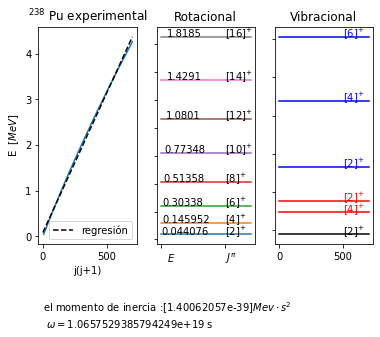

In [ ]:
E=np.array([0.044076, 0.145952, 0.30338 ,0.51358 ,0.77348, 1.0801, 1.4291 ,1.8185, 2.2449, 2.7057, 3.1988, 3.7208 ,4.2652])
j=np.array([2,4,6,8,10,12,14,16,18,20,22,24,26]).reshape((-1, 1))
jsuper=(j+1)*j
x=np.linspace(0,jsuper[-1],100)
fig,(ax1,ax2,ax3)=plt.subplots(1,3)
model = LinearRegression()
model.fit(jsuper,E)
ax1.plot(jsuper,E)
ax1.plot(x,x*model.coef_+ model.intercept_,linestyle='dashed',color='black',label='regresión')
ax1.legend()
ax1.set_xlabel('j(j+1)')
ax1.set_ylabel('E  $[MeV]$')
for i in range(8):
  y=np.ones(100)*E[i]
  ax2.plot(x,y)
  ax2.text(x[i],y[i],str(E[i]))
  ax2.text(x[0]+500,y[i],str(j[i])+'$^{+}$')
ax2.text(500,-0.2,'$J^{\pi}$')
ax2.text(50,-0.2,'$E$')
I=hbar**2/(2*model.coef_)
omega=E[0]/hbar*2
ax1.text(0,-2,'el momento de inercia :'+str(I)+'$Mev \cdot s^2$ \n $\omega=$' + str(omega)+' s')
ax2.set_xticklabels([])
ax1.set_title('$^{238}$ Pu experimental')
ax2.set_title('Rotacional')
ax3.set_title('Vibracional')
y=np.ones(100)*E[0]
ax3.plot(x,y,color='black')
ax3.text(x[0]+500,y[0],str(j[0])+'$^{+}$')
ax3.set_yticklabels([])
ax2.set_yticklabels([])
y=np.ones(100)*E[0]
ax3.plot(x,y*2,color='red')
ax3.text(x[0]+500,2*y[0],str(j[0])+'$^{+}$',color='red')
y=np.ones(100)*E[1]
ax3.plot(x,y/2,color='red')
ax3.text(x[0]+500,y[0]/2,str(j[1])+'$^{+}$',color='red')
y=np.ones(100)*E[0]
ax3.plot(x,y*3,color='blue')
ax3.text(x[0]+500,3*y[0],str(j[0])+'$^{+}$',color='blue')
ax3.set_yticklabels([])
y=np.ones(100)*E[1]
ax3.plot(x,y*3/2,color='blue')
ax3.text(x[0]+500,3*y[0]/2,str(j[1])+'$^{+}$',color='blue')
y=np.ones(100)*E[2]
ax3.plot(x,y,color='blue')
ax3.text(x[0]+500,y[0],str(j[2])+'$^{+}$',color='blue')

Para los 3 casos $224 Th,238 U,238 Pu$ la cantidad de protones y neutrones es par-par y debido a esto se ve que el modelo se adapta muy bien al modelo, para comprobarlo utilice la energía de la siguiente manera:
$$E=\frac{\hbar^2}{2I}J(J+1)$$
Se graficaron las energías experimentales obtenidas de: *H. A. Alhendi, H. H. Alharbi, S. U. El-Kameesy, “Nuclear Structure Study of Some Actinides
Nuclei”, nucl-th/0502017.*. en función de $J(J+1)$ ya que esto es una linea recta con pendiente $\frac{\hbar^2}{2I}$ se puede de allí obtener el momento de inercia $I=[1.043\times10^{-39},1,25\times10^{-39},1,400\times10^{-39}] $Mev  s, respectivamente para cada nucleo. es de notar que los datos se ajustan a dicha linea recta de manera que los nucleos escogidos si se adaptan al modelo.
finalmente del diagrama vibracional se tiene que $E(2^{+})=\frac{\hbar \omega}{2}$ de modo que para cada nucleo se tiene respectivamente: $\omega=4.74\times^{19}s,1.08\times 10^{19}s, 1.06 \times 10^{19}s$